
# Project: Investigate a FBI Gun Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, brief introduction to the dataset you've selected for analysis. At the end of this section, described the questions that I plan on exploring over the course of the report. 
> 
> And then I familiarize myself with the variables and the dataset context for ideas of what to explore.

> **I referred to below website for better understanding the data metrics and statistical outcomes I'll be working with.**

Link : https://www.nssf.org/understanding-nssf-adjusted-nics-and-the-underlying-reason-gun-sales-remain-strong/

## Questions to investigate

> 1. Find corelation between the trend of casualities in mass shootings vs Total Count by states from 2015 to 2016 ?
> 2. What census data is most associated with high gun per capita?
> 3. Which states have had the highest growth in gun registrations?
> 4. What is the overall trend of gun purchases?


In [158]:
# cell to set up import statements for all of the packages that you
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> I included Gun Violence Dataset from kaggle in my findings to expand my area of insights and experiment with it however possible.

Link : https://www.kaggle.com/gunviolencearchive/gun-violence-database#mass_shootings_all.csv

### General Properties

In [159]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_gun = pd.read_excel('gun-data.xlsx')
df_census = pd.read_csv('census.csv')
df_mass = pd.read_csv('mass_shootings.csv')
df_gun.head()


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [160]:
# check the data types of variables in the gun dataset
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [161]:
# check the data type of variables in the census dataset
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [162]:
# check the data type of variables in the census dataset
df_mass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Incident Date   500 non-null    object 
 1   State           500 non-null    object 
 2   City Or County  500 non-null    object 
 3   Address         498 non-null    object 
 4   # Killed        500 non-null    int64  
 5   # Injured       500 non-null    int64  
 6   Operations      0 non-null      float64
dtypes: float64(1), int64(2), object(4)
memory usage: 27.5+ KB


In [163]:
# check the top rows of mass shootings dataset
df_mass.tail()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
495,"July 25, 2015",Virginia,Hopewell,500 block of N. 7th Ave,0,4,NaN
496,"July 24, 2015",Pennsylvania,Erie,200 block of West 29th Street,2,4,NaN
497,"July 23, 2015",Louisiana,Lafayette,3141 Johnson Street,3,9,NaN
498,"July 22, 2015",Georgia,Suwanee,5500 block of Old Atlanta Road,5,0,NaN
499,"July 21, 2015",Florida,Miami Gardens,Northwest 25th Avenue and Miami Gardens Drive,1,3,NaN


In [164]:
# Describing the gun dataset
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [165]:
# check for any duplicated rows in both datasets
sum(df_gun.duplicated())

0

In [166]:
sum(df_census.duplicated())

3

In [167]:
# Checking useless rows in the census dataset inferred using .info() method.
df_census.iloc[64:,:]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
64,FIPS Code,NaN,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NOTE: FIPS Code values are enclosed in quotes ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Value Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Fact Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,(a),Includes persons reporting only one race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,(b),"Hispanics may be of any race, so also are incl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
# Check for number of null values in this column
df_census['Fact Note'].isnull().sum()

57

### Data Cleaning 

Number of issues to be handled :

Step 1: Replace the Nan field with mean of each column for gun data

Step 2: Drop fact Note column since it is not used and will affect groupby function.

Step 3: Removal of useless rows in the census dataset.

Step 4: Extract Year and months column based on Month in Gun data

Step 5: Convert data type from string to float for all the state column in Census data


In [169]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_gun.fillna(df_gun.mean(),inplace = True,axis = 0)

In [170]:
df_census = df_census.iloc[:64,:].drop('Fact Note',axis = 1)
sum(df_census.duplicated())

0

In [171]:
df_gun['year']=df_gun['month'].apply(lambda x: x.split("-")[0]).astype(int)
df_gun['year'].unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998])

In [172]:
df_gun['months'] = df_gun['month'].apply(lambda x: x.split("-")[1]).astype(int)
df_gun['months'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11, 10])

In [173]:
states=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',  
        'Hawaii', 'Idaho', 'Illinois','Indiana', 'Iowa', 'Kansas', 
        'Kentucky', 'Louisiana', 'Maine','Maryland', 'Massachusetts', 
        'Michigan','Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon','Pennsylvania', 
        'Rhode Island', 'South Carolina','South Dakota', 'Tennessee', 'Texas', 'Utah', 
        'Vermont','Virginia', 'Washington', 'West Virginia','Wisconsin', 'Wyoming']

In [174]:
for state in states:
    df_census[state].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    df_census[state]=pd.to_numeric(df_census[state], downcast='float', errors='ignore')

In [175]:
cols = ['permit', 'permit_recheck', 'handgun','long_gun','other','admin','prepawn_handgun','prepawn_long_gun',            
'prepawn_other','redemption_handgun', 'redemption_long_gun','redemption_other','returned_handgun','returned_long_gun' ,          
'returned_other','rentals_handgun', 'rentals_long_gun', 'private_sale_handgun' , 'private_sale_long_gun',        
'private_sale_other', 'return_to_seller_handgun',  'return_to_seller_long_gun','return_to_seller_other']

df_gun[cols] = df_gun[cols].applymap(np.int64)

<a id='eda'></a>
## Exploratory Data Analysis

> Now that I've trimmed and cleaned data, I'm ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that are posed in the Introduction section. 

### Research Question 1 

> Find any corelation between the trend of casualities in mass shootings vs Total Count by states from 2015 to 2016.

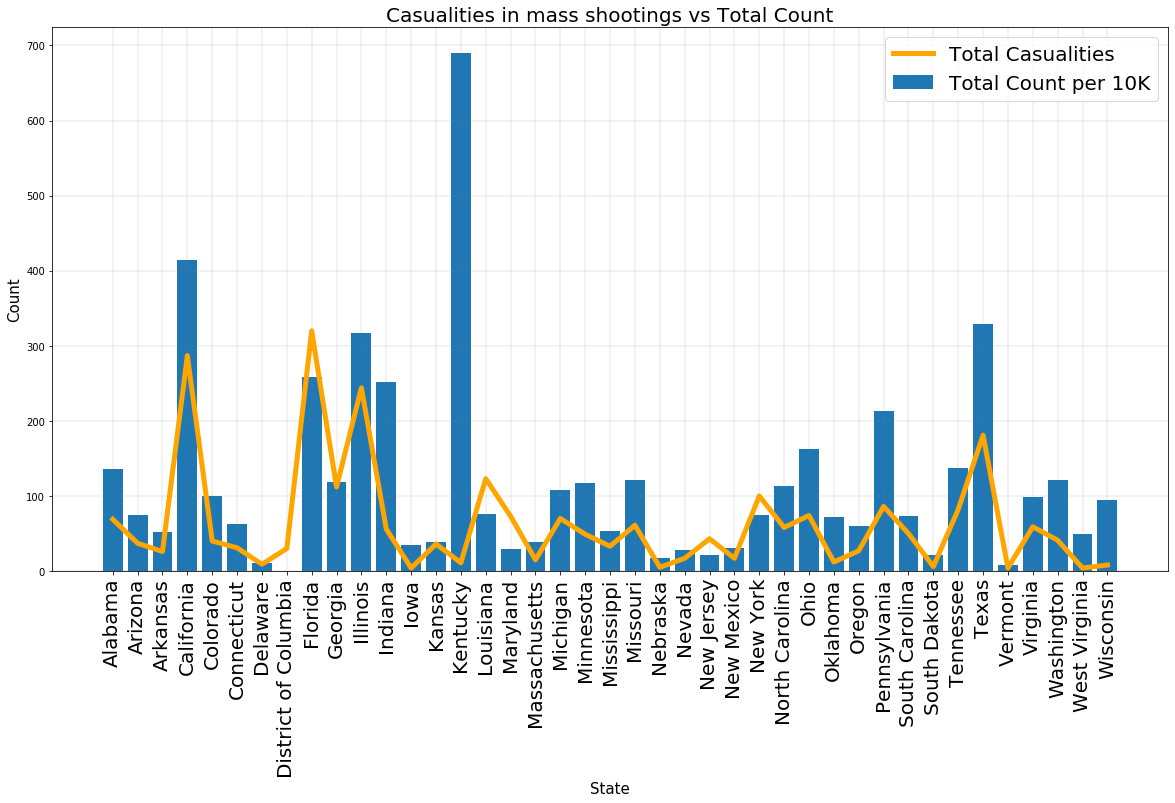

In [176]:
# Group by gun data by state and total count
guntotal= df_gun.query('year == 2016 or year == 2015').groupby(['state'])['totals'].sum().reset_index()

# rename the column to facilitate merging
guntotal.rename(columns={'state':'State'},inplace = True)

# Group by mass shooting data and number of people killed and injured
shooting_data = df_mass.groupby(['State'])[['# Killed','# Injured']].sum().reset_index()

# merge two datasets to form another dataset by inner join on state
shooting_data = shooting_data.merge(guntotal, on='State', how='inner')

# Add both killed and injured in one column 
shooting_data['Total_Casualities']=shooting_data['# Killed'] + shooting_data['# Injured']

# Plot the trend of casualities in mass shootings vs Total Count by states
x = shooting_data['State']
plt.figure(figsize = (20,10))
plt.plot(x,shooting_data['Total_Casualities'],label = 'Total Casualities',color ='orange',linewidth= 5)
plt.bar(x,shooting_data['totals']/int(10000),label = 'Total Count per 10K')
plt.title('Casualities in mass shootings vs Total Count',fontsize = 20)
plt.xlabel('State',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.grid(color='grey', linestyle='-', linewidth= 0.2)
plt.xticks(x, rotation=90)
plt.legend(fontsize = 20)
plt.tick_params(axis='x', labelsize= 20)

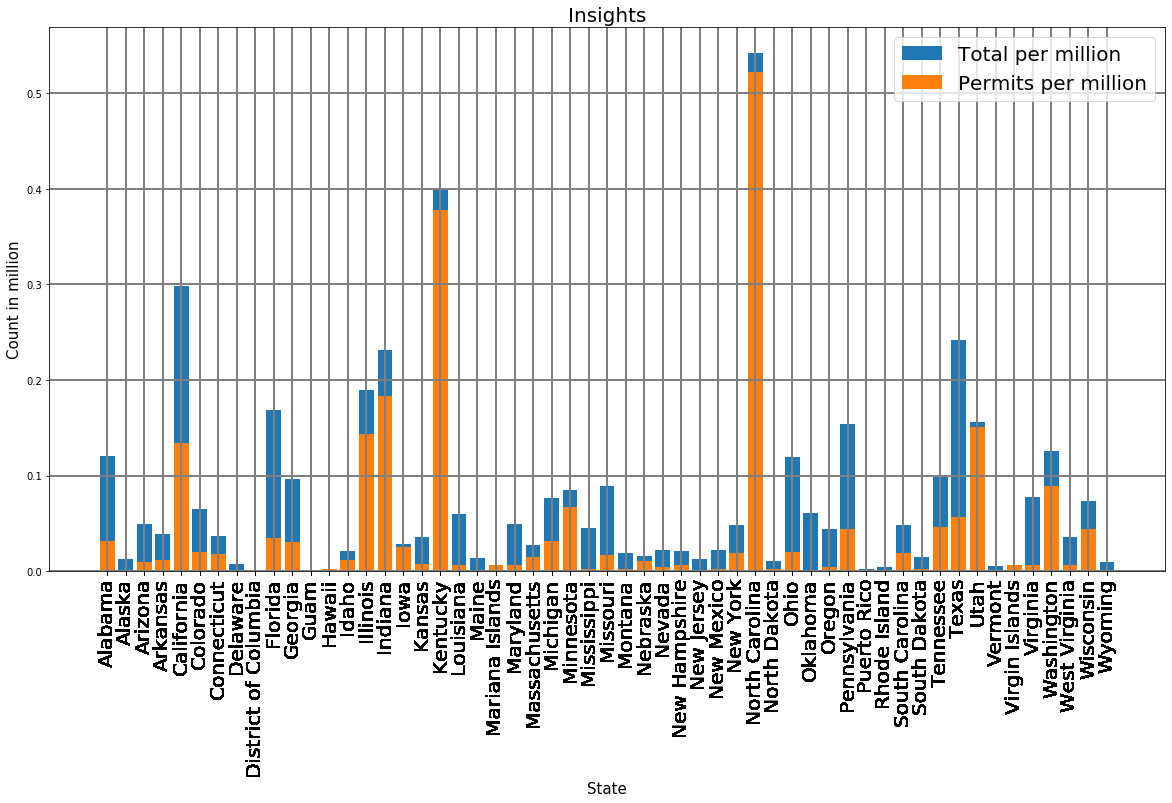

In [177]:
# Question - Number of permits and total count across all states from 1998 to 2020.
x = df_gun['state']
plt.figure(figsize = (20,10))
plt.bar(x,df_gun['totals']/int(1e6),label = 'Total per million')
plt.bar(x,df_gun['permit']/int(1e6),label = 'Permits per million')
plt.title('Insights',fontsize = 20)
plt.xlabel('State',fontsize = 15)
plt.ylabel('Count in million',fontsize = 15)
plt.grid(color='grey', linestyle='-', linewidth=2)
plt.xticks(x, rotation=90)
plt.legend(fontsize = 20)
plt.tick_params(axis='x', labelsize= 20)

### Research Question 2

> What census data is most associated with high gun per capita?

In [178]:
#Transpose Census data and remove the index on Fact
df_census.set_index('Fact',inplace=True)
df_census_T = df_census.T.reset_index()

In [179]:
df_census_T.rename(columns={'index':'state'},inplace = True)

#Get subset data for 2016 and 2010
df_gun_16=df_gun[df_gun['year'] == 2016]
df_gun_10=df_gun[df_gun['year'] == 2010]

#Group by gun data by state and gun totals for 2010 and 2016 
guntotal_16= df_gun_16.groupby(['state'])['totals'].sum().reset_index()
guntotal_10= df_gun_10.groupby(['state'])['totals'].sum().reset_index()
 
#Rename the dataset to represent different time point 
guntotal_16.rename(columns={'totals':'2016_totals'},inplace = True)
guntotal_10.rename(columns={'totals':'2010_totals'},inplace = True)

#Merge 2010 and 2016 gun data summary 
guntotal = guntotal_16.merge(guntotal_10, on='state', how='inner')

#Merge gun and census data with inner join, by state column 
result = guntotal.merge(df_census_T, on='state', how='inner')

#calculate Gun_Per_Capital for 2016
result['Gun_Per_Capital_2016'] = result['2016_totals']/result['Population estimates, July 1, 2016,  (V2016)']

#calculate Gun_Per_Capital for 2010
result['Gun_Per_Capital_2010'] = result['2010_totals']/result['Population estimates base, April 1, 2010,  (V2016)']

#Top 5  the highest state per capital on 2010
result.nlargest(5,'Gun_Per_Capital_2010')

,state,2016_totals,2010_totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)",...,"Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",Gun_Per_Capital_2016,Gun_Per_Capital_2010
16,Kentucky,3676847,2385579,4436974.0,4339344.0,220.0,4339367.0,620.0,650.0,2280.0,...,184154.0,106011.0,27258.0,296155.0,33208.0,282704.0,1099.0,3948634.0,0.828683,0.549756
43,Utah,294907,553134,3051217.0,2763888.0,1040.0,2763885.0,830.0,950.0,3020.0,...,132163.0,76269.0,24423.0,218826.0,18754.0,219807.0,336.0,8216962.0,0.096652,0.200129
25,Montana,136337,101095,1042520.0,989414.0,540.0,989415.0,600.0,630.0,2180.0,...,55913.0,35449.0,5578.0,102746.0,11486.0,93393.0,68.0,14554580.0,0.130776,0.102177
1,Alaska,87647,65909,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,...,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0,0.118140,0.092797
47,West Virginia,242350,159550,1831102.0,1853011.0,120.0,1852994.0,550.0,560.0,2050.0,...,63112.0,39065.0,5777.0,104785.0,12912.0,94960.0,771.0,2403821.0,0.132352,0.086103


White alone, percent, July 1, 2016,  (V2016)


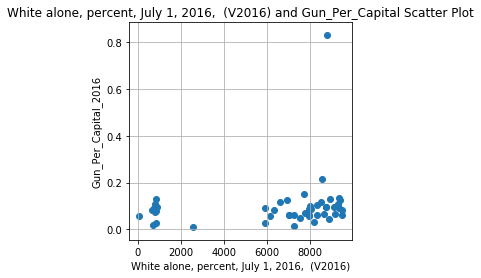

Persons 65 years and over, percent, April 1, 2010


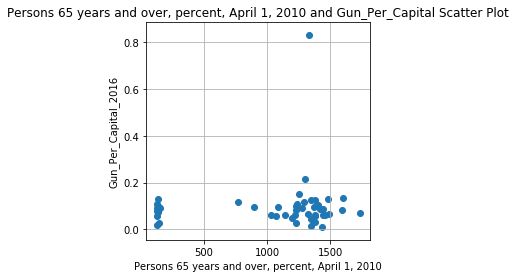

Owner-occupied housing unit rate, 2011-2015


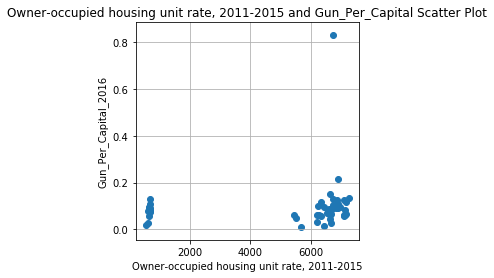

Asian alone, percent, July 1, 2016,  (V2016)


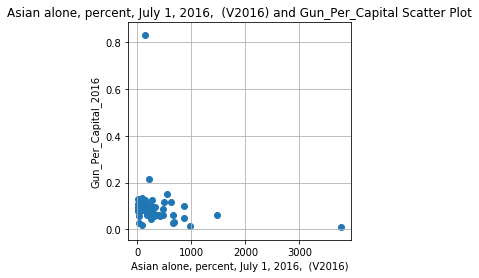

Foreign born persons, percent, 2011-2015


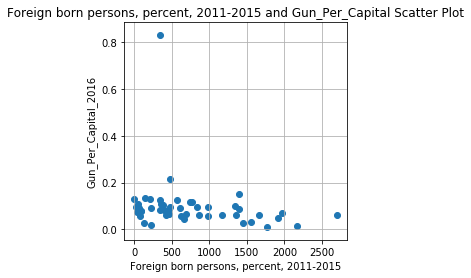

Median gross rent, 2011-2015


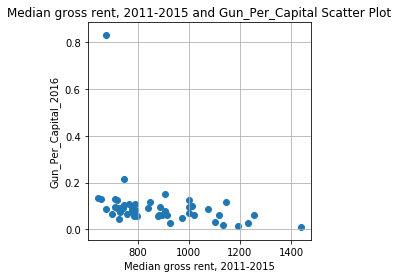

In [180]:
#Kept only 6 variable in fact table to create scatter plot with Gun Per capital since others were not useful in associations.
fact = result.drop(['Gun_Per_Capital_2010','state','2016_totals','2010_totals'],axis=1)


imp =['White alone, percent, July 1, 2016,  (V2016)',
    'Persons 65 years and over, percent, April 1, 2010',
    'Owner-occupied housing unit rate, 2011-2015',
    'Asian alone, percent, July 1, 2016,  (V2016)',
    'Foreign born persons, percent, 2011-2015', 
    'Median gross rent, 2011-2015']

for col in imp:
    plt.figure(figsize=(4,4))
    print(col)
    plt.scatter(fact[col],fact['Gun_Per_Capital_2016'], label =col)
    plt.title(col+" and Gun_Per_Capital Scatter Plot")     
    plt.ylabel("Gun_Per_Capital_2016")
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

### Research Question 3

> Which states have had the highest growth in gun registrations?

In [181]:
##Calculate the increasing percentage of gun registrations from 2010 to 2016
result['gun_growth'] = result['2016_totals']/(result['2016_totals']-result['2010_totals'])

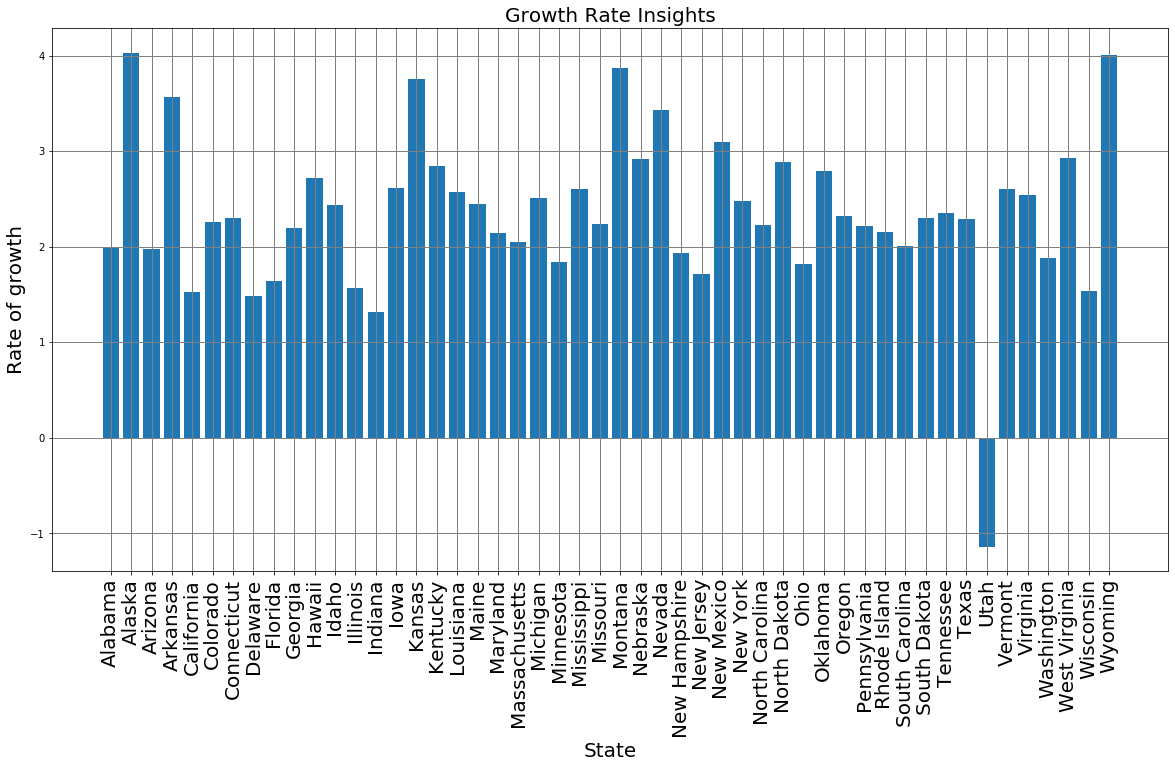

In [182]:
#Create Bar chart for every states'gun growth
x = result['state']
plt.figure(figsize = (20,10))
plt.bar(x,result['gun_growth'])
plt.title('Growth Rate Insights',fontsize = 20)
plt.xlabel('State',fontsize = 20)
plt.ylabel('Rate of growth',fontsize = 20)
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.xticks(x, rotation=90)
plt.tick_params(axis='x', labelsize= 20)

### Research Question 4 

> What is the overall trend of gun purchases?

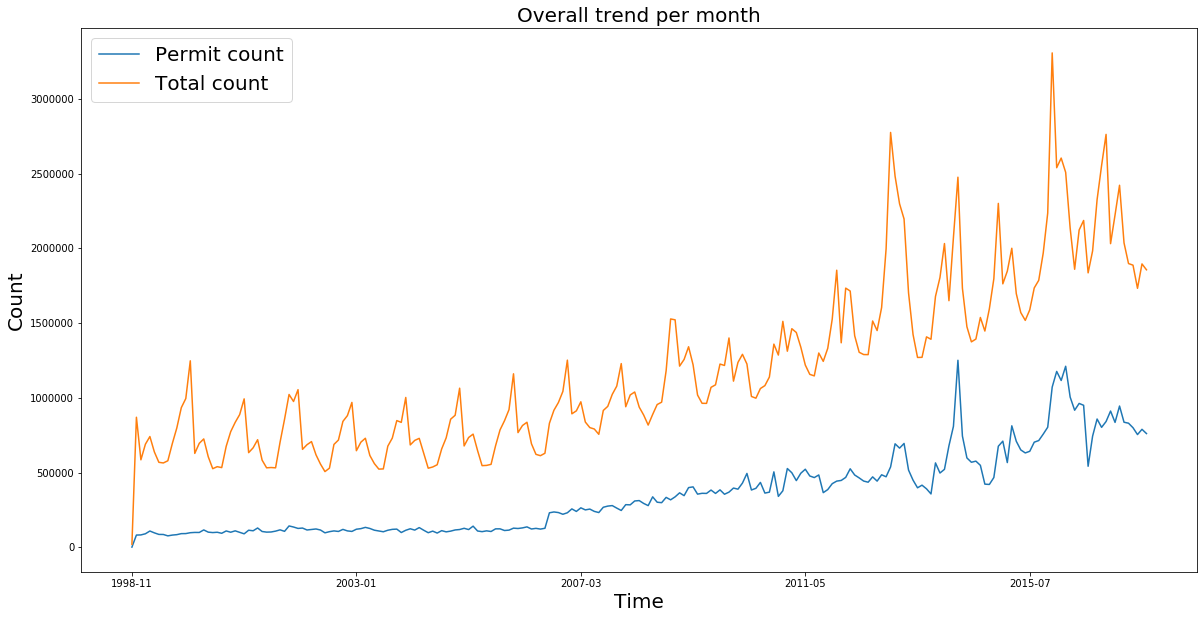

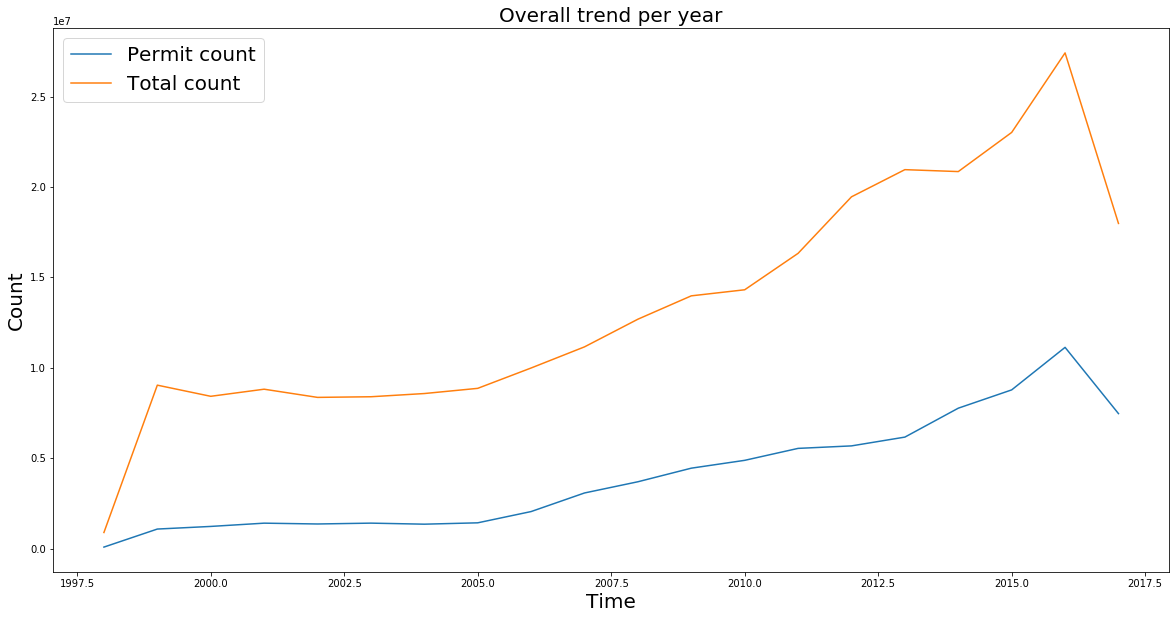

In [183]:
#Create line chart using grouped data by year ,month, which can be used to observe the change patten 
#during the season

plt.figure(figsize=(20,10))
df_gun.groupby('month')['permit'].sum().plot(kind='line',sharex=True, sharey=True, layout = (2, 1),label = 'Permit count')
df_gun.groupby('month')['totals'].sum().plot(kind='line',sharex=True, sharey=True, layout = (3, 2),label = 'Total count')
plt.title('Overall trend per month',fontsize = 20)
plt.xlabel('Time',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

plt.figure(figsize=(20,10))
df_gun.groupby('year')['permit'].sum().plot(kind='line',sharex=True, sharey=True, layout = (2, 1),label = 'Permit count')
df_gun.groupby('year')['totals'].sum().plot(kind='line',sharex=True, sharey=True, layout = (3, 2),label = 'Total count')
plt.title('Overall trend per year',fontsize = 20)
plt.xlabel('Time',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

<a id='conclusions'></a>
## Conclusions



### Datasets Descriptions :
FBI Gun Data , US Census Data and Kaggle Gun Violence Data are three independent tables.
Their common variables include states and it requires data cleaning with removal of nan values and removal of few columns for getting accurate insights.

### Questions to investigate

> 1. Find corelation between the trend of casualities in mass shootings vs Total Count by states from 2015 to 2016 ?
> 2. What census data is most associated with high gun per capita?
> 3. Which states have had the highest growth in gun registrations?
> 4. What is the overall trend of gun purchases?

### Limitations :
> 1. Missing or nan values in the dataset which could affect our understanding of the long term insights of particular variable.
> 2. Presence of outliers in the dataset adversely affects strength of other data values in calculations.
> 3. Non-standardisation of the datasets

### Findings :

> 1. Kentucky has the largest count of total gun sales and one of the lowest count total casualities in the mass shootings between 2015 and 2016 which suggests presence of tougher gun permit verifications and indicates more rigorous checking of permit licences.
On the other hand Florida has the highest count of casualities which calls for better system checks in the state and better background checks to prevent such incidents in the future.

> 2. There are few weak associations between the census variables and gun per capita: 
The positive association between gun per capita and variables which includes: White alone, percent, July 1, 2016, (V2016) Persons 65 years and over, percent, April 1, 2010 owner-occupied housing unit rate, 2011 -2015 
The negative association between gun per capita and variables which includes: 2011-2015 Asian alone, percent, July 1, 2016, (V2016) Foreign born persons, percent, 2011-2015 Median gross rent, 2011-2015

> 3. Count of gun registrations have gone up in every state except Utah inferred from positive growth in the gun registrations. Alaska has the biggest growth in gun registrations by more than 400% followed by Wyoming, Montana, Kansas and Arkansas.
This could suggest either they are outliers or , increased dependence and trust of people on firearms and decreased trust on police institutions or increased safety concers caused by various number of reasons.

> 4. From the Line chart of gun sales vs years 1997 - 2016, there is increasing trend of gun purchases with sudden increases in year 2015 and 1998 and decrease in year 2016 which is partially due to data collection of only 9 months in that year.

## Result :
There is postive trend in gun purchase over the years and state is the most important variable for comparing the data along with few weak association with the census variables.